# selenium 라이브러리

1. 웹 어플리케이션 테스트를 위한 라이브러리(원래 not for 크로울링)
2. python에서 웹브라우저를 제어하는 기능
3. 웹 드라이버를 별도 설치 필요

In [19]:
!pip install prettyprint

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for prettyprint: started
  Running setup.py install for prettyprint: finished with status 'done'


  DEPRECATION: prettyprint is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [20]:
import prettyprint as pp

In [1]:
# 라이브러리 설치

!pip install selenium

     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.5 MB 660.6 kB/s eta 0:00:10
      --------------------------------------- 0.1/6.5 MB 1.1 MB/s eta 0:00:07
      --------------------------------------- 0.1/6.5 MB 1.1 MB/s eta 0:00:06
     - -------------------------------------- 0.2/6.5 MB 1.1 MB/s eta 0:00:06
     - -------------------------------------- 0.3/6.5 MB 1.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/6.5 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.5 MB 1.3 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.5 MB 1.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.5/6.5 MB 1.2 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/6.5 MB 1.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/6.5 MB 1.2 MB/s eta 0:00:05
     ---- ----------------------------------- 0.7/6.5 MB 1.2 MB/s eta

In [2]:
# 라이브러리 로드

from selenium import webdriver

In [3]:
# 웹드라이버 파일의 위치 지정

path = '../chromedriver.exe'

In [6]:
# 웹드라이버 실행

driver = webdriver.Chrome(path)  # 그냥 열어보는 거임 


C:\Users\zino0\AppData\Local\Temp\ipykernel_2240\3558196788.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)  # 그냥 열어보는 거임


In [7]:
#웹 주소창에 값을 입력
driver.get('https://www.naver.com')

In [8]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [9]:
# 검색어창 지정
element = driver.find_element(By.ID, 'query')

In [10]:
# element에 입력할 값을 지정

element.send_keys('날씨')

In [11]:
# Enter 키 눌러보자

element.send_keys(Keys.ENTER)

In [12]:
from bs4 import BeautifulSoup as bs

In [13]:
soup = bs(driver.page_source, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.p
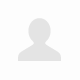
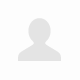

In [14]:
print(soup)

In [24]:
data = soup.find('ul', attrs = {
    'class' : 'list_news'})

data


<ul class="list_news"> <li class="bx" id="sp_nws_all1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://www.yna.co.kr/view/AKR20230410129351081?input=1195m" href="#" onclick="tCR('a=nws_all*h.kep&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws_all*h.kepoff&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript" data-cr-on="a=nws_all*h.kepon&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=nws_all*h.kephome&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u='+urlencode(this.href))

In [26]:
_list = data.find_all('a', attrs = {
    'class' : 'news_tit'
})

In [27]:
result= []

for i in _list : 
    result.append(i.get_text())
result

['프랑스 몽블랑 눈사태로 6명 사망…"따뜻해진 날씨 영향일 수도"(종합)',
 "오늘의 날씨, 비온 뒤 기온 뚝…미세먼지 '나쁨'",
 "아침부터 '황사비'에 돌풍…수도권 미세먼지 '매우나쁨'[내일날씨]",
 "[오늘의 날씨] 황사 덮쳐 미세먼지 '나쁨'…전국 잠시 '흙비'"]

In [42]:
# 네이버증권 현대차 

driver = webdriver.Chrome(path)

code = '005380'
driver.get('https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=' + code)


C:\Users\zino0\AppData\Local\Temp\ipykernel_2240\2240538186.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [43]:
element = driver.find_element(By.CLASS_NAME, 'menu')
print(element)

<selenium.webdriver.remote.webelement.WebElement (session="6a852057228c2b54c036c8fc2ea4bf41", element="a0ee3228-ac6b-4caa-bbae-01f307abfc4d")>


In [44]:
element2 = element.find_elements(By.TAG_NAME, 'a')[3]
element2.click()


In [45]:
soup = bs(driver.page_source, 'html.parser')

In [47]:
data = soup.find_all('table', attrs={
    'class' : 'gHead01 all-width data-list'
})[1]

In [49]:
# 컬럼 부분에 들어갈 값을 추출

_list =  data.find_all('th')

In [51]:
col_list = []

for i in _list : 
    col_list.append(i.get_text())

col_list

['항목',
 '\n2018/12(IFRS연결)\n',
 '\n2019/12(IFRS연결)\n',
 '\n2020/12(IFRS연결)\n',
 '\n2021/12(IFRS연결)\n',
 '\n2022/12(IFRS연결)\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t연간컨센서스보기\n\n',
 '\n2023/12(E)(IFRS연결)\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t연간컨센서스닫기\n\n',
 '\n전년대비(YoY)\n',
 '\n전년대비(YoY)\n']

In [53]:
# value 값 추출

data2 = data.find('tbody')

In [55]:
data3 = data2.find_all('tr')

In [57]:
value_list = []

for i in data3 :
    sample_list = []
    _list = i.find_all('td')
    for j in _list :
        sample_list.append(j.get_text())
    value_list.append(sample_list)

value_list


[['\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\tEPS\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '5,352',
  '10,761',
  '5,143',
  '17,846',
  '26,592',
  '31,707',
  '49',
  '19'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t당기순이익(지배)＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '15,080.8',
  '29,800.5',
  '14,244.4',
  '49,423.6',
  '73,643.6',
  '87,009.1',
  '\xa0',
  '\xa0'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t보통주수정평균발행주식수＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '217,415,903',
  '213,668,187',
  '213,668,187',
  '213,668,187',
  '213,668,187',
  '211,724,685',
  '\xa0',
  '\xa0'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t우선주수정평균발행주식수＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '64,366,142',
  '63,270,871',
  '63,270,871',
  '63,270,871',
  '63,270,871',
  '62,695,368',
  '\xa0',
  '\xa0'],
 ['\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\tBPS\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '256,422',
  '267

In [65]:

col = []
for i in col_list : 
    result = i.replace('\n', "")
    result = result.replace("연간컨센서스보기", '').replace('연간컨센서스닫기', '')
    col.append(result.strip())
col

['항목',
 '2018/12(IFRS연결)',
 '2019/12(IFRS연결)',
 '2020/12(IFRS연결)',
 '2021/12(IFRS연결)',
 '2022/12(IFRS연결)',
 '2023/12(E)(IFRS연결)',
 '전년대비(YoY)',
 '전년대비(YoY)']

In [68]:
df = pd.DataFrame(value_list, columns = col)
df

,항목,2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(IFRS연결),2022/12(IFRS연결),2023/12(E)(IFRS연결),전년대비(YoY),전년대비(YoY)
0,\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\...,"5,352","10,761","5,143","17,846","26,592","31,707",49,19
1,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"15,080.8","29,800.5","14,244.4","49,423.6","73,643.6","87,009.1",,
2,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"217,415,903","213,668,187","213,668,187","213,668,187","213,668,187","211,724,685",,
3,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"64,366,142","63,270,871","63,270,871","63,270,871","63,270,871","62,695,368",,
4,\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\...,"256,422","267,549","266,968","289,609","315,142","347,220",9,10
5,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"679,739.7","700,658.0","694,806.3","749,861.2","823,492.9","909,438.6",,
6,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"204,280,606","201,833,036","200,576,769","199,619,945","202,259,476","202,870,846",,
7,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"60,805,434","60,047,227","59,681,734","59,302,110","59,049,027","59,049,027",,
8,\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\...,"13,359","1,516","-1,480","-4,248","38,374","52,979","1,003",38
9,\n\n \n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\...,"37,642.7","4,197.8","-4,098.1","-11,764.2","106,273.1","136,265.8",,


In [87]:
# 이제 항목의 values들의 이상한것들좀 지워보자

def change(x) : 
    result = x.replace('\n', '')
    result = result.replace('\t', '')
    result = result.replace('펼치기', '')
    
    return result

df['항목'] = df['항목'].apply(change)
df

,항목,2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(IFRS연결),2022/12(IFRS연결),2023/12(E)(IFRS연결),전년대비(2022),전년대비(2023)
0,EPS,"5,352","10,761","5,143","17,846","26,592","31,707",49,19
1,당기순이익(지배)＜당기＞,"15,080.8","29,800.5","14,244.4","49,423.6","73,643.6","87,009.1",,
2,보통주수정평균발행주식수＜당기＞,"217,415,903","213,668,187","213,668,187","213,668,187","213,668,187","211,724,685",,
3,우선주수정평균발행주식수＜당기＞,"64,366,142","63,270,871","63,270,871","63,270,871","63,270,871","62,695,368",,
4,BPS,"256,422","267,549","266,968","289,609","315,142","347,220",9,10
5,자본총계(지배)＜당기＞,"679,739.7","700,658.0","694,806.3","749,861.2","823,492.9","909,438.6",,
6,보통주수정기말발행주식수(자사주차감)＜당기＞,"204,280,606","201,833,036","200,576,769","199,619,945","202,259,476","202,870,846",,
7,우선주수정기말발행주식수(자사주차감)＜당기＞,"60,805,434","60,047,227","59,681,734","59,302,110","59,049,027","59,049,027",,
8,CPS,"13,359","1,516","-1,480","-4,248","38,374","52,979","1,003",38
9,영업활동현금흐름＜당기＞,"37,642.7","4,197.8","-4,098.1","-11,764.2","106,273.1","136,265.8",,


In [88]:
df.columns = ['항목', '2018/12(IFRS연결)', '2019/12(IFRS연결)', '2020/12(IFRS연결)',
       '2021/12(IFRS연결)', '2022/12(IFRS연결)', '2023/12(E)(IFRS연결)', '전년대비(2022)',
       '전년대비(2023)']




In [ ]:
df.columns

In [81]:
df

,항목,2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(IFRS연결),2022/12(IFRS연결),2023/12(E)(IFRS연결),전년대비(2022),전년대비(2023)
0,EPS,"5,352","10,761","5,143","17,846","26,592","31,707",49,19
1,당기순이익(지배)＜당기＞,"15,080.8","29,800.5","14,244.4","49,423.6","73,643.6","87,009.1",,
2,보통주수정평균발행주식수＜당기＞,"217,415,903","213,668,187","213,668,187","213,668,187","213,668,187","211,724,685",,
3,우선주수정평균발행주식수＜당기＞,"64,366,142","63,270,871","63,270,871","63,270,871","63,270,871","62,695,368",,
4,BPS,"256,422","267,549","266,968","289,609","315,142","347,220",9,10
5,자본총계(지배)＜당기＞,"679,739.7","700,658.0","694,806.3","749,861.2","823,492.9","909,438.6",,
6,보통주수정기말발행주식수(자사주차감)＜당기＞,"204,280,606","201,833,036","200,576,769","199,619,945","202,259,476","202,870,846",,
7,우선주수정기말발행주식수(자사주차감)＜당기＞,"60,805,434","60,047,227","59,681,734","59,302,110","59,049,027","59,049,027",,
8,CPS,"13,359","1,516","-1,480","-4,248","38,374","52,979","1,003",38
9,영업활동현금흐름＜당기＞,"37,642.7","4,197.8","-4,098.1","-11,764.2","106,273.1","136,265.8",,


In [91]:
from datetime import datetime

In [97]:
now = datetime.now()
now = now.strftime("%Y%m%d%H%M%S")
print(now)

20230411135907


In [98]:
df.to_csv(f'test_0411({now}).csv')

In [90]:
pd.read_csv('test_0411.csv')

,Unnamed: 0,항목,2018/12(IFRS연결),2019/12(IFRS연결),2020/12(IFRS연결),2021/12(IFRS연결),2022/12(IFRS연결),2023/12(E)(IFRS연결),전년대비(2022),전년대비(2023)
0,0,EPS,"5,352","10,761","5,143","17,846","26,592","31,707",49,19
1,1,당기순이익(지배)＜당기＞,"15,080.8","29,800.5","14,244.4","49,423.6","73,643.6","87,009.1",,
2,2,보통주수정평균발행주식수＜당기＞,"217,415,903","213,668,187","213,668,187","213,668,187","213,668,187","211,724,685",,
3,3,우선주수정평균발행주식수＜당기＞,"64,366,142","63,270,871","63,270,871","63,270,871","63,270,871","62,695,368",,
4,4,BPS,"256,422","267,549","266,968","289,609","315,142","347,220",9,10
5,5,자본총계(지배)＜당기＞,"679,739.7","700,658.0","694,806.3","749,861.2","823,492.9","909,438.6",,
6,6,보통주수정기말발행주식수(자사주차감)＜당기＞,"204,280,606","201,833,036","200,576,769","199,619,945","202,259,476","202,870,846",,
7,7,우선주수정기말발행주식수(자사주차감)＜당기＞,"60,805,434","60,047,227","59,681,734","59,302,110","59,049,027","59,049,027",,
8,8,CPS,"13,359","1,516","-1,480","-4,248","38,374","52,979","1,003",38
9,9,영업활동현금흐름＜당기＞,"37,642.7","4,197.8","-4,098.1","-11,764.2","106,273.1","136,265.8",,
